# Dealing with missing vlues 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# load the titanic dataset into df
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [55]:
df.isnull().sum()
# from this show there are missing values in age and embarked

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:
# we show the missing values in assending order
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

<Axes: >

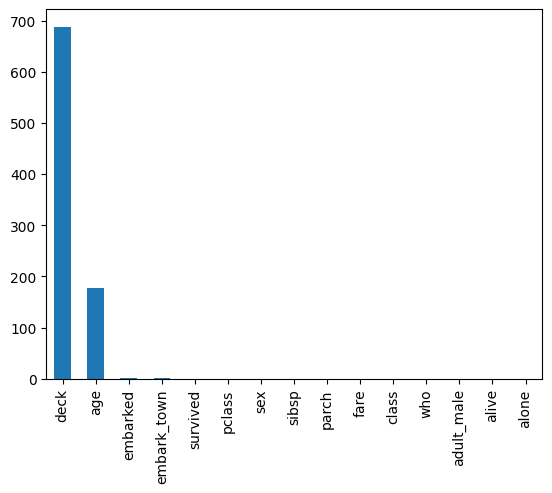

In [57]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [58]:
(df.isnull().sum().sort_values(ascending=False) / len(df) * 100).round(2)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

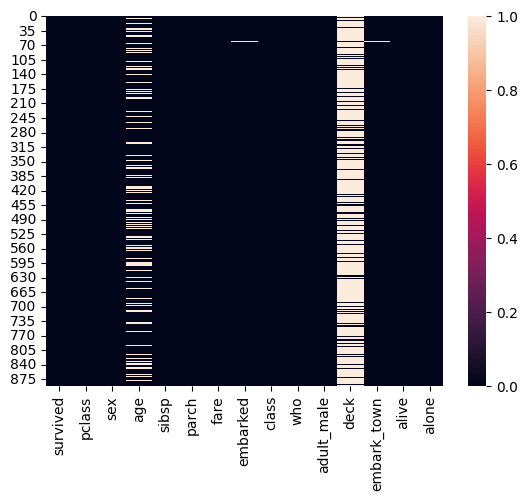

In [59]:
# Create a heatmap of missing values
sns.heatmap(df.isnull())

# Display the heatmap
plt.show()

In [60]:
# impute the missing values of age with median
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_1904\604148428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


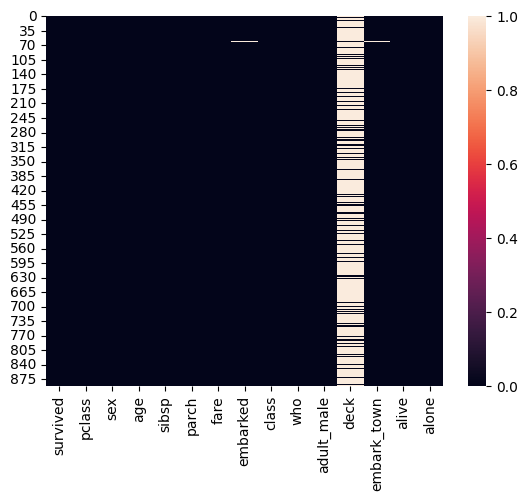

In [61]:
# Create a heatmap of missing values
sns.heatmap(df.isnull())

# Display the heatmap
plt.show()

From above heatmap show's that missing values of age colume is impute there is no any missing value in age column

In [62]:
# drop the columns of deck
# df['deck']=df.drop('deck', axis=1)
# Drop the 'deck' column
df.drop('deck', axis=1, inplace=True)
# 

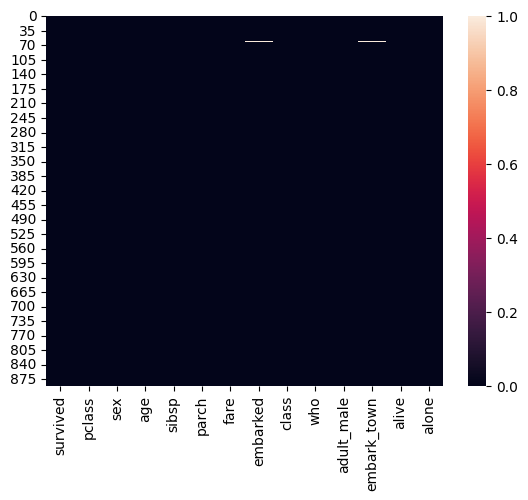

In [63]:
# Create a heatmap of missing values
sns.heatmap(df.isnull())

# Display the heatmap
plt.show()

from above heap map show's that embarked column is removed successfully
now embarked and embark_down are categorical value so that impute with mode

In [64]:
# impute embarked and embarked_down with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_1904\1406885638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\Yahya\AppData\Local\Temp\ipykernel_1904\1406885638.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

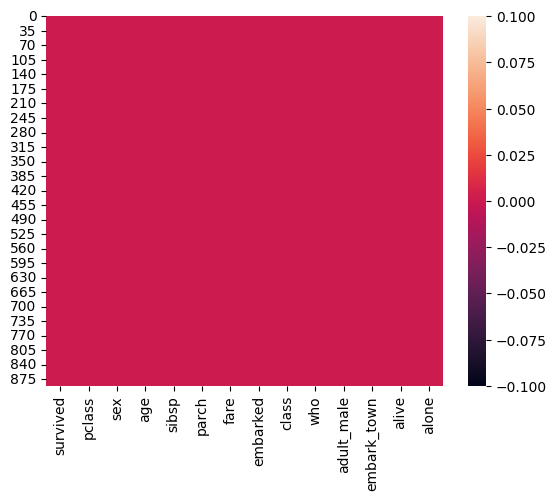

In [65]:
# Create a heatmap of missing values
sns.heatmap(df.isnull())

# Display the heatmap
plt.show()

from above heatmap show's that there is no any missing value in our dataset

In [66]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Now this dataset is clean with null values, means there is no any null value in this dataset,
- Above method we using mean, median and mode
- But we can impute using sklearn 
- Now let's start...........

# For This purpose we reload the dataset again 


In [67]:
# import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [73]:
# load the dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
# impute age column from imputer using sklearn
imputer = SimpleImputer(strategy='mean')
data['age'] = imputer.fit_transform(data[['age']])

# if i want to impute with median then code change slidely
# imputer = SimpleImputer(strategy='median')
# data['age'] = imputer.fit_transform(data[['age']])


In [78]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### Concept of univariate and multivariate

<details>
<summary><span style="color:purple">Univariate Imputation</span></summary>

**Univariate Imputation:**
In Python, Univariate Imputation fills missing values using a single variable, often with the mean, median, or mode.

Above method is **Univariate Imputation**.

</details>

<details>
<summary><span style="color:purple">Multivariate Imputation</span></summary>

**Multivariate Imputation:**
In Python, Multivariate Imputation addresses missing values by considering information from multiple variables, leveraging relationships for more accurate estimation.

However, we can also perform imputation using **Multivariate Imputation**.

</details>

Check this [link](https://scikit-learn.org/stable/modules/impute.html) for details.
### For this purpose we reload the dataset also


In [79]:
data_1 = sns.load_dataset('titanic')

In [82]:
data_1.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [86]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column from imputer using sklearn IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5) # max_iter=10, random_state=0, n_nearest_features=5 these are used for hyperparameter tuning 
data_1['age'] = imputer.fit_transform(data_1[['age']])

In [84]:
data_1.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### Forward fill and Backword fill
load dataset again for this purpose

<details>
<summary><span style="color:brown">Forward Fill (ffill):</span></summary>
forward fill is like copying the last known value and filling it forward. It helps fill missing values in a dataset by using the most recent known value.

In simple forword fill m null value aya to us m phly waly value fill krta h 

</details>
<details>
<summary><span style="color:brown">Backward Fill (bfill):</span></summary>
In Markdown, backward fill is like copying the next known value and filling it backward. It assists in filling missing values by using the upcoming known value in the dataset.


In simple backword fill m null value aya to us m baad waly value fill krta h

</details>

In [106]:
df1 = sns.load_dataset('titanic')

In [109]:
df1.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,54.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [108]:
# impute age column with forward fill
df1['age']= df1['age'].bfill()

In [110]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [111]:
df2 = sns.load_dataset('titanic')

In [116]:
# impute using KNN

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df2['age'] = imputer.fit_transform(df2[['age']])

In [117]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<details>
<summary style="color:brown; font-weight: bold;">Conclusion:</summary>

### Missing Values and their Importance:

In this notebook, we explored various methods for handling missing values. Each method has its own significance in data preprocessing.

- **Mean:** Filling missing values with the average of the existing values.
- **Median:** Filling missing values with the middle value of the dataset.
- **Mode:** Filling missing values with the most frequent value in the dataset, mode are used for categorical data
- **Univariate Imputation:** Filling missing values using information from a single variable.
- **Multivariate Imputation:** Filling missing values using information from multiple variables. Note that this method is experimental, as mentioned in the documentation.
- **KNN Method:** Filling missing values based on the values of its k-nearest neighbors.

These methods play a crucial role in ensuring the integrity of our data and contribute to the overall quality of our analysis and modeling.

</details>
